<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.035941,74.826010,21.681241,44.220730,-0.012175,180.751747,180.790104,-0.038357
1,0.0,1.0,94.512861,93.122813,41.966630,37.232154,0.356376,277.190835,277.160974,0.029861
2,0.0,2.0,79.285699,40.724252,27.598777,79.341036,-0.320760,236.629003,237.176218,-0.547215
3,0.0,3.0,59.440586,73.982044,44.176997,39.150832,-0.135881,226.614578,226.793532,-0.178955
4,0.0,4.0,45.728781,92.189873,28.030735,61.735680,0.009594,237.694663,237.829179,-0.134516
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.743178,81.256350,33.398659,35.631835,0.045737,198.075758,197.750039,0.325719
29996,999.0,26.0,74.168700,62.953983,42.845727,53.604706,-0.059086,243.514030,243.665369,-0.151339
29997,999.0,27.0,99.965326,38.528210,40.233126,27.184511,0.011328,215.922501,216.104592,-0.182091
29998,999.0,28.0,77.690583,66.393883,30.667121,98.863188,-0.268511,283.346265,283.794383,-0.448118


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.035941  74.826010  21.681241  44.220730 -0.012175  180.751747   
      1.0    94.512861  93.122813  41.966630  37.232154  0.356376  277.190835   
      2.0    79.285699  40.724252  27.598777  79.341036 -0.320760  236.629003   
      3.0    59.440586  73.982044  44.176997  39.150832 -0.135881  226.614578   
      4.0    45.728781  92.189873  28.030735  61.735680  0.009594  237.694663   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.743178  81.256350  33.398659  35.631835  0.045737  198.075758   
      26.0   74.168700  62.953983  42.845727  53.604706 -0.059086  243.514030   
      27.0   99.965326  38.528210  40.233126  27.184511  0.011328  215.922501   
      28.0   77.690583  66.393883  30.667121  98.863188 -0.268511  283.346265   
      29.0   99.620535  39.475555  48.725051  77.562975  0.272394  275.656509   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.790104 -0.038357  
      1.0    277.160974  0.029861  
      2.0    237.176218 -0.547215  
      3.0    226.793532 -0.178955  
      4.0    237.829179 -0.134516  
...                 ...       ...  
999.0 25.0   197.750039  0.325719  
      26.0   243.665369 -0.151339  
      27.0   216.104592 -0.182091  
      28.0   283.794383 -0.448118  
      29.0   275.761173 -0.104664  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.035941  74.826010  21.681241  44.220730 -0.012175  180.751747   
      1.0    94.512861  93.122813  41.966630  37.232154  0.356376  277.190835   
      2.0    79.285699  40.724252  27.598777  79.341036 -0.320760  236.629003   
      3.0    59.440586  73.982044  44.176997  39.150832 -0.135881  226.614578   
      4.0    45.728781  92.189873  28.030735  61.735680  0.009594  237.694663   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.743178  81.256350  33.398659  35.631835  0.045737  198.075758   
      26.0   74.168700  62.953983  42.845727  53.604706 -0.059086  243.514030   
      27.0   99.965326  38.528210  40.233126  27.184511  0.011328  215.922501   
      28.0   77.690583  66.393883  30.667121  98.863188 -0.268511  283.346265   
      29.0   99.620535  39.475555  48.725051  77.562975  0.272394  275.656509   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.790104 -0.038357  
      1.0    277.160974  0.029861  
      2.0    237.176218 -0.547215  
      3.0    226.793532 -0.178955  
      4.0    237.829179 -0.134516  
...                 ...       ...  
999.0 25.0   197.750039  0.325719  
      26.0   243.665369 -0.151339  
      27.0   216.104592 -0.182091  
      28.0   283.794383 -0.448118  
      29.0   275.761173 -0.104664  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,30.035941,74.826010,21.681241,44.220730,-0.012175,180.751747,180.790104,-0.038357
1,0.0,1.0,94.512861,93.122813,41.966630,37.232154,0.356376,277.190835,277.160974,0.029861
2,0.0,2.0,79.285699,40.724252,27.598777,79.341036,-0.320760,236.629003,237.176218,-0.547215
3,0.0,3.0,59.440586,73.982044,44.176997,39.150832,-0.135881,226.614578,226.793532,-0.178955
4,0.0,4.0,45.728781,92.189873,28.030735,61.735680,0.009594,237.694663,237.829179,-0.134516
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.743178,81.256350,33.398659,35.631835,0.045737,198.075758,197.750039,0.325719
29996,999.0,26.0,74.168700,62.953983,42.845727,53.604706,-0.059086,243.514030,243.665369,-0.151339
29997,999.0,27.0,99.965326,38.528210,40.233126,27.184511,0.011328,215.922501,216.104592,-0.182091
29998,999.0,28.0,77.690583,66.393883,30.667121,98.863188,-0.268511,283.346265,283.794383,-0.448118


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    30.035941  74.826010  21.681241  44.220730 -0.012175  180.751747   
      1.0    94.512861  93.122813  41.966630  37.232154  0.356376  277.190835   
      2.0    79.285699  40.724252  27.598777  79.341036 -0.320760  236.629003   
      3.0    59.440586  73.982044  44.176997  39.150832 -0.135881  226.614578   
      4.0    45.728781  92.189873  28.030735  61.735680  0.009594  237.694663   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.743178  81.256350  33.398659  35.631835  0.045737  198.075758   
      26.0   74.168700  62.953983  42.845727  53.604706 -0.059086  243.514030   
      27.0   99.965326  38.528210  40.233126  27.184511  0.011328  215.922501   
      28.0   77.690583  66.393883  30.667121  98.863188 -0.268511  283.346265   
      29.0   99.620535  39.475555  48.725051  77.562975  0.272394  275.656509   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    180.790104 -0.038357  
      1.0    277.160974  0.029861  
      2.0    237.176218 -0.547215  
      3.0    226.793532 -0.178955  
      4.0    237.829179 -0.134516  
...                 ...       ...  
999.0 25.0   197.750039  0.325719  
      26.0   243.665369 -0.151339  
      27.0   216.104592 -0.182091  
      28.0   283.794383 -0.448118  
      29.0   275.761173 -0.104664  

[30000 rows x 8 columns]

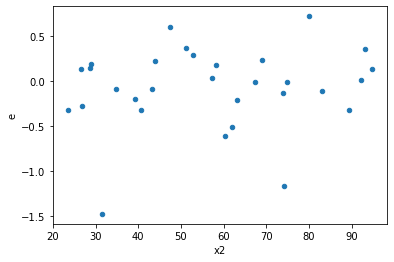

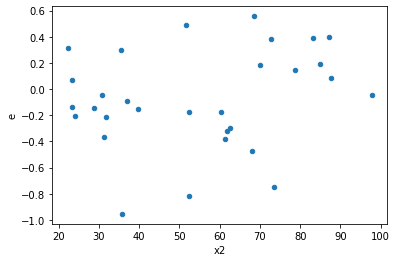

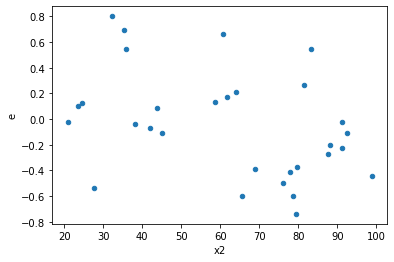

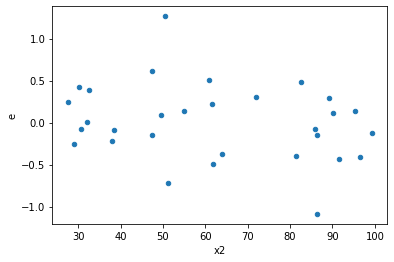

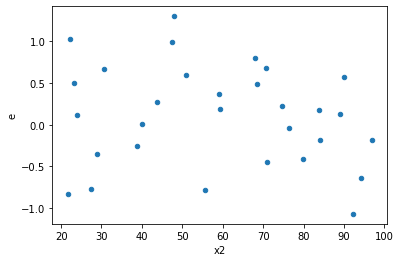

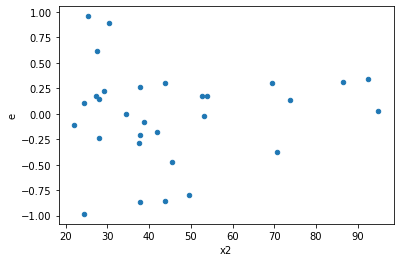

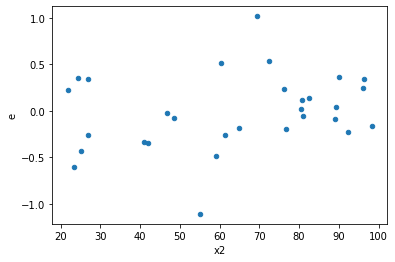

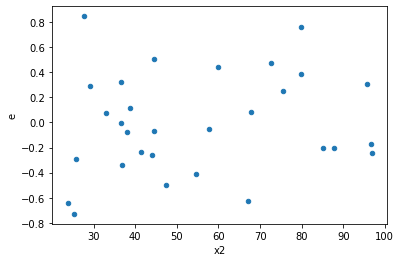

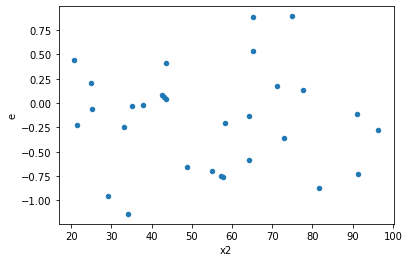

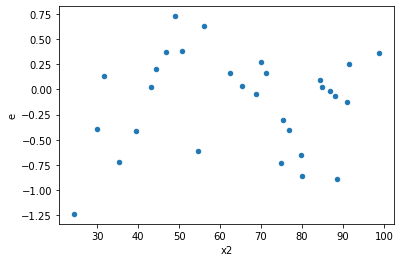

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,7.0,1.3279728663286128,2.185147750771831,0.08853152442190752,0.3121639643959759,3.5260204366110464,0.0989055330106634,0.9505472334946683,0.0494527665053317,Reject005=1 : Homoscedasticity
1.0,11.0,11.0,0.7915247353990253,1.3512150268464511,0.07195679412718413,0.12283772971331373,1.7071039809833273,0.3886892578651375,0.8056553710674312,0.19434462893256876,Reject005=1 : Homoscedasticity
2.0,11.0,11.0,0.8091354122093396,1.24545762419792,0.0735577647463036,0.1132234203816291,1.5392449834783588,0.48608511643781194,0.756957441781094,0.24304255821890597,Reject005=1 : Homoscedasticity
3.0,15.0,7.0,1.7520267411611794,2.5340799144379784,0.11680178274407862,0.36201141634828266,3.0993655049039495,0.13621432540408862,0.9318928372979557,0.06810716270204431,Reject005=1 : Homoscedasticity
6.0,13.0,9.0,1.2365663025755746,1.3385127254898914,0.09512048481350574,0.1487236361655435,1.5635289964841188,0.5076028702508797,0.7461985648745602,0.25380143512543984,Reject005=1 : Homoscedasticity
8.0,13.0,9.0,2.5073085893192792,4.101310949887758,0.1928698914860984,0.4557012166541953,2.3627390109619113,0.20027559690739505,0.8998622015463025,0.10013779845369752,Reject005=1 : Homoscedasticity
9.0,13.0,9.0,2.1616636604774975,3.0752835704056847,0.1662818200367306,0.3416981744895205,2.0549340536087564,0.2821968380976523,0.8589015809511739,0.14109841904882614,Reject005=1 : Homoscedasticity
10.0,11.0,11.0,3.1347656309023053,3.6640795859720243,0.2849786937183914,0.3330981441792749,1.168852800302446,0.8004202660925741,0.599789866953713,0.40021013304628705,Reject005=1 : Homoscedasticity
11.0,9.0,13.0,2.013908757925944,3.410482167762416,0.22376763976954933,0.26234478213557044,1.1723982181058459,0.7701600355850335,0.6149199822074832,0.38508001779251677,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,7.0,1.3279728663286128,2.185147750771831,0.08853152442190752,0.3121639643959759,3.5260204366110464,0.0989055330106634,Reject005=1 : Homoscedasticity
1.0,11.0,11.0,0.7915247353990253,1.3512150268464511,0.07195679412718413,0.12283772971331373,1.7071039809833273,0.3886892578651375,Reject005=1 : Homoscedasticity
2.0,11.0,11.0,0.8091354122093396,1.24545762419792,0.0735577647463036,0.1132234203816291,1.5392449834783588,0.48608511643781194,Reject005=1 : Homoscedasticity
3.0,15.0,7.0,1.7520267411611794,2.5340799144379784,0.11680178274407862,0.36201141634828266,3.0993655049039495,0.13621432540408862,Reject005=1 : Homoscedasticity
4.0,12.0,10.0,3.8417839819773456,1.5720751990923962,0.3201486651647788,0.15720751990923962,0.49104537052598907,0.24314209957592303,Reject005=1 : Homoscedasticity
5.0,12.0,10.0,1.9572921589261016,1.3950272686073617,0.16310767991050848,0.13950272686073617,0.8552799410627168,0.7860911937927131,Reject005=1 : Homoscedasticity
6.0,13.0,9.0,1.2365663025755746,1.3385127254898914,0.09512048481350574,0.1487236361655435,1.5635289964841188,0.5076028702508797,Reject005=1 : Homoscedasticity
7.0,13.0,9.0,1.5930656540477521,0.9284621827691709,0.12254351184982709,0.1031624647521301,0.8418435476090501,0.7541050783308344,Reject005=1 : Homoscedasticity
8.0,13.0,9.0,2.5073085893192792,4.101310949887758,0.1928698914860984,0.4557012166541953,2.3627390109619113,0.20027559690739505,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      909
Reject005=0 : Heteroscedasticity     91
Name: Result_test, dtype: int64